# Overview
      Each major branch of a supermarket located in 3 cities across the Nigeria recorded sales information for 3 months, to help the company understand sales trends and determine its growth, as the rise of supermarkets competition is seen. The data folder contains datasets from three different branches; Lagos, Abuja and Port-Harcourt. Each data file from the branches contains the same attribute information  

## Problem Statement
- Which branch had the highest sales and revenue during the observed period, and how can the other branches improve their performance?

- Are there any products that consistently underperform across all branches, and what can be done to improve their sales?

- What are the peak sales periods, and how can the company optimize inventory management during these periods to prevent stockouts and improve sales?

- Are there any demographic patterns in the sales data, such as certain products being more popular among certain genders, and how can the company leverage this information to better target its marketing efforts?


- Are there any notable trends or patterns in customer ratings and feedback, and how can the company address any recurring issues or concerns to improve customer satisfaction?

- Does the price of a product influence a customers buying habit

## 1. Loading the Dataset
    combining  the dataset from each branch (3 branches) into one dataset for easy analysis. 

In [1]:
#import relevant dependencies

import pandas as pd
import numpy as np 
import seaborn as sb 
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

plt.figure(figsize=(10,5))


from matplotlib import rcParams

#figure size in inches
rcParams ['figure.figsize'] = 10.7,5.27

<Figure size 720x360 with 0 Axes>

In [2]:
lag_df = pd.read_csv('Lagos_Branch.csv')
abj_df = pd.read_csv('Abuja_Branch.csv')
ph_df = pd.read_csv('Port_Harcourt_Branch.csv')

#Concating datasets from the three branches
frame = [abj_df, lag_df, ph_df]
all_stores_df = pd.concat(frame, sort=False)

#Export to csv
all_stores_df.to_csv('all_Branch.csv')


In [3]:
all_stores = pd.read_csv('all_Branch.csv')
all_stores.head()

,Unnamed: 0,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2/20/2019,13:27,Card,59227.2,4.761905,2961.36,5.9
1,1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,02/06/2019,18:07,Epay,20851.2,4.761905,1042.56,4.5
2,2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,03/09/2019,17:03,Cash,36734.4,4.761905,1836.72,6.8
3,3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,1/15/2019,16:19,Cash,202435.2,4.761905,10121.76,4.5
4,4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,03/11/2019,15:30,Epay,29016.0,4.761905,1450.80,4.4


### 2. Data Exploration

In [4]:
#To check the number of rows and columns present in the combined dataset
all_stores_df.shape

(1000, 17)

In [5]:
#Data Information
all_stores_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 327
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
# quick overview of the missing data occurence
all_stores_df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [7]:
#data statistical summary 
all_stores_df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000
mean,20041.966800,5.510000,5536.572840,116268.029640,110731.456800,4.761905e+00,5536.572840,6.97270
std,9538.066205,2.923431,4215.177173,88518.720636,84303.543463,6.131498e-14,4215.177173,1.71858
min,3628.800000,1.000000,183.060000,3844.260000,3661.200000,4.761905e+00,183.060000,4.00000
25%,11835.000000,3.000000,2132.955000,44792.055000,42659.100000,4.761905e+00,2132.955000,5.50000
50%,19882.800000,5.000000,4351.680000,91385.280000,87033.600000,4.761905e+00,4351.680000,7.00000
75%,28056.600000,8.000000,8080.290000,169686.090000,161605.800000,4.761905e+00,8080.290000,8.50000
max,35985.600000,10.000000,17874.000000,375354.000000,357480.000000,4.761905e+00,17874.000000,10.00000


 #### Data Statistical Summary 
  - The statistical summary of the data provides us with several insights into the distribution of the data points within each column. For instance, the average unit price is 20,041.97 with a minimum value of 3628.80 and a maximum value of 35,985.60. The standard deviation of the unit price is 9,538.07, which indicates that the data points are dispersed from the mean. The quartile values of the unit price show that 25% of the transactions had a unit price of less than 11,835.00, 50% of the transactions had a unit price of less than 19,882.80, and 75% of the transactions had a unit price of less than 28,056.60.

- The statistical summary also reveals that the average quantity sold per transaction is 5.51, with a minimum of 1 and a maximum of 10. The standard deviation of the quantity sold is 2.92, indicating that the quantity sold varied significantly across transactions. The quartile values show that 25% of transactions involved selling less than 3 units, 50% of transactions involved selling less than 5 units, and 75% of transactions involved selling less than 8 units.

- Furthermore, the average tax charged on each transaction is 5,536.57, which is 5% of the total cost of goods sold (cogs). The standard deviation of the tax charged is 4,215.18, indicating that the tax charged varied across transactions. The quartile values show that 25% of transactions had a tax charged of less than 2,132.96, 50% of transactions had a tax charged of less than 4,351.68, and 75% of transactions had a tax charged of less than 8,080.29.

- The average gross margin percentage is 4.76%, with a standard deviation of 6.19x10^-14, indicating that the gross margin percentage was relatively consistent across transactions. The quartile values show that 25% of transactions had a gross margin percentage of less than 4.76%, 50% of transactions had a gross margin percentage of less than 4.76%, and 75% of transactions had a gross margin percentage of less than 4.76%.

- The average gross income per transaction is 5,536.57, which is the total revenue minus the cost of goods sold. The standard deviation of the gross income is 4,215.18, indicating that the gross income varied across transactions. The quartile values show that 25% of transactions had a gross income of less than 2,132.96, 50% of transactions had a gross income of less than 4,351.68, and 75% of transactions had a gross income of less than 8,080.29.

- Finally, the rating column shows that the minimum rating is 4.0, the maximum rating is 10.0, and the average rating is 6.97. This indicates that the products/services offered received a range of ratings from customers.

## 3. DateTime Features

From the summary above, date and time columns are not in the appropriate data type. this need to be converted to datetime datatype using the to_datetime() method.

In [8]:
all_stores_df['Date'] = pd.to_datetime(all_stores_df['Date'])
all_stores_df['Time'] = pd.to_datetime(all_stores_df['Time'])


In [9]:
print(all_stores_df['Date'].dtype)
print(all_stores_df['Time'].dtype)


datetime64[ns]
datetime64[ns]


#### Extracting Features from date & time


In [10]:
#Extract the Day feature from the Date column
all_stores_df['Day'] = all_stores_df['Date'].dt.day


In [11]:
#Extract the month feature from the Date column
all_stores_df['Month'] = all_stores_df['Date'].dt.month

In [12]:
all_stores_df.shape

(1000, 19)

### 4. Unique Values in Columns

In [13]:
# Creating a list of the categorical column in the dataset. 
#Iterate through the columns and check if each element is an object datatype. 
#The result is saved to the "categorical_columns" variable as a list.


categorical_columns = [col for col in all_stores_df.columns if all_stores_df[col].dtype == "object" ]
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment']

In [14]:
#generating  the total number of unique values in the categorical columns 
for col in categorical_columns:
    print("Total Number of unique values in the {} Column : {}". format(col, len(all_stores_df[col].unique().tolist())))
    print('\n')


Total Number of unique values in the Invoice ID Column : 1000


Total Number of unique values in the Branch Column : 3


Total Number of unique values in the City Column : 3


Total Number of unique values in the Customer type Column : 2


Total Number of unique values in the Gender Column : 2


Total Number of unique values in the Product line Column : 6


Total Number of unique values in the Payment Column : 3




In [15]:
# Generating the 
for col in categorical_columns:
    print("Value counts in the {} Column : {}". format(col, all_stores_df[col].value_counts()))
    print('\n')

Value counts in the Invoice ID Column : 692-92-5582    1
849-09-3807    1
324-92-3863    1
593-08-5916    1
558-60-5016    1
              ..
365-64-0515    1
252-56-2699    1
829-34-3910    1
656-95-9349    1
233-67-5758    1
Name: Invoice ID, Length: 1000, dtype: int64


Value counts in the Branch Column : A    340
B    332
C    328
Name: Branch, dtype: int64


Value counts in the City Column : Lagos            340
Abuja            332
Port Harcourt    328
Name: City, dtype: int64


Value counts in the Customer type Column : Member    501
Normal    499
Name: Customer type, dtype: int64


Value counts in the Gender Column : Female    501
Male      499
Name: Gender, dtype: int64


Value counts in the Product line Column : Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64


Value counts in the Payment Column : Epay    345
Cash

### 5.  Aggregration of the Cities, Month and Product line

In [16]:
df_sum = all_stores_df.groupby(by='City').sum()
df_mean = all_stores_df.groupby(by='City').mean()


In [18]:
# To show the total across the three branches
df_sum[['Total']]


,Total
City,
Abuja,38231161.92
Lagos,38232133.38
Port Harcourt,39804734.34


It appears that Port Harcourt has the highest total sales compared to the other two cities. 

In [38]:
df_month = all_stores_df.groupby(by='Month').sum()
df_month[['Total']]

,Total
Month,
1,41865072.48
2,34998974.64
3,39403982.52


January has the highest total sales 

In [19]:
all_stores_df.groupby(by='Product line').sum()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month
Product line,,,,,,,,,,
Electronic accessories,3277357.2,971,931500.54,19561511.34,18630010.8,809.523810,931500.54,1177.2,2759,348
Fashion accessories,3662406.0,902,930958.20,19550122.20,18619164.0,847.619048,930958.20,1251.2,2717,346
Food and beverages,3508394.4,952,962483.04,20212143.84,19249660.8,828.571429,962483.04,1237.7,2645,348
Health and beauty,3001636.8,854,843321.24,17709746.04,16866424.8,723.809524,843321.24,1064.5,2373,312
Home and lifestyle,3186255.6,911,923347.08,19390288.68,18466941.6,761.904762,923347.08,1094.0,2287,324
Sports and travel,3405916.8,920,944962.74,19844217.54,18899254.8,790.476190,944962.74,1148.1,2475,315


 - The data reveals that the product line with the highest total sales is Food and Beverages, followed closely by Electronic Accessories and Fashion Accessories. Health and Beauty has the lowest total sales, indicating a potential opportunity to increase sales in that product line. Additionally, all product lines have a gross margin percentage above 70%, suggesting that the business is profitable.

### 6. Data Visualization

Text(0.5, 1.0, 'Most sold product line')

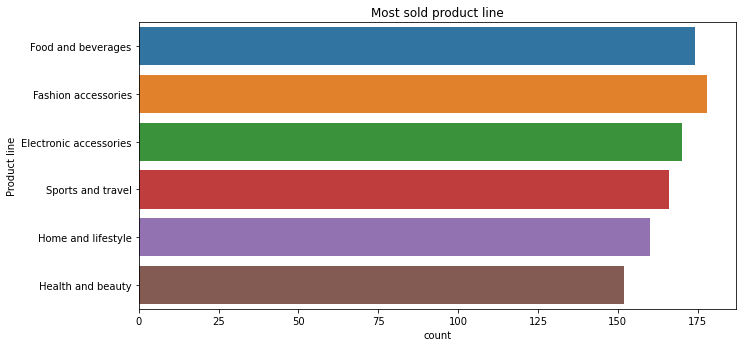

In [20]:
#Visualize the Counts

sb.countplot(y='Product line', data=all_stores_df).set_title('Most sold product line')


Text(0.5, 1.0, 'Most used payment method')

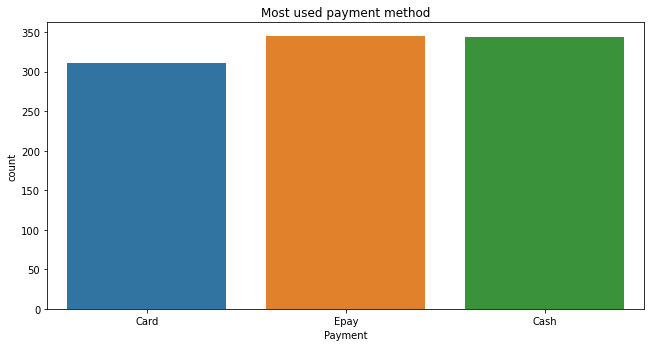

In [21]:
sb.countplot(x='Payment', data = all_stores_df).set_title('Most used payment method')


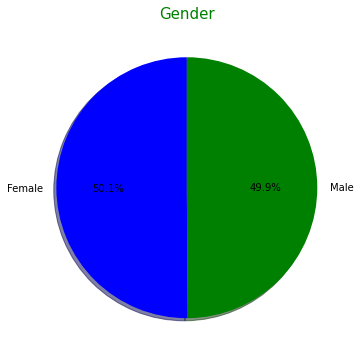

In [22]:
labels = all_stores_df["Gender"].value_counts().index
sizes = all_stores_df["Gender"].value_counts()
colors = ['blue','green'] 
plt.figure(figsize = (6,6))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, startangle=90)
plt.title('Gender',color = 'green',fontsize = 15)
plt.show()

Text(0.5, 1.0, 'Branch with highest Total sales from Jan-March')

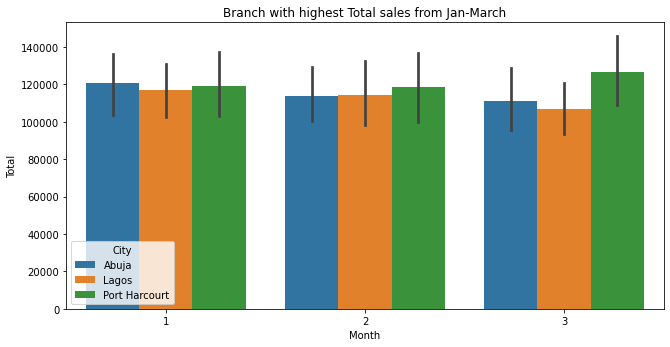

In [37]:
sb.barplot(x='Month',y='Total',hue='City', data=all_stores_df).set_title('Branch with highest Total sales from Jan-March')

Text(0.5, 1.0, 'Branch with highest Total sales')

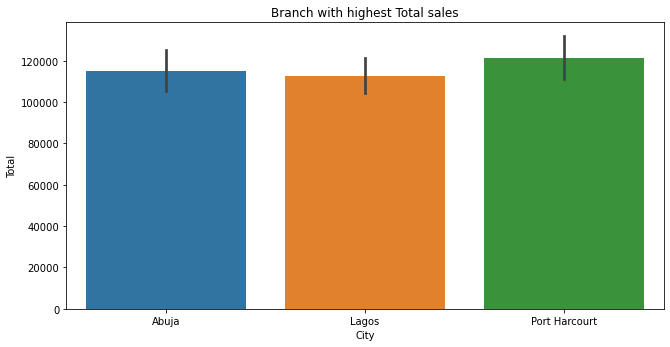

In [23]:
sb.barplot(x='City',y='Total', data=all_stores_df).set_title('Branch with highest Total sales')

Text(0.5, 1.0, 'Payment Channel per Branch')

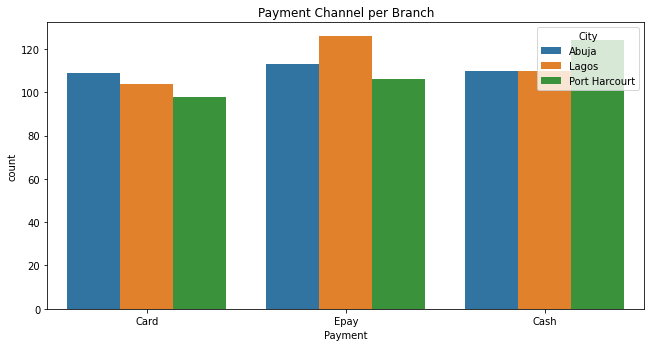

In [24]:
sb.countplot(x='Payment', data=all_stores_df, hue='City').set_title('Payment Channel per Branch')


Text(0.5, 1.0, 'Customer type sales record')

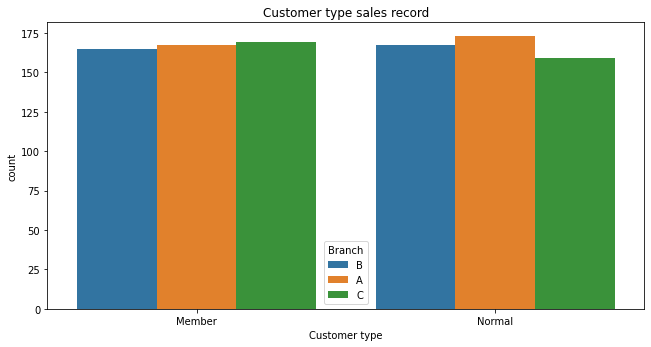

In [25]:
sb.countplot(x='Customer type', data=all_stores_df, hue='Branch').set_title('Customer type sales record')


Text(0.5, 1.0, 'Branch rating')

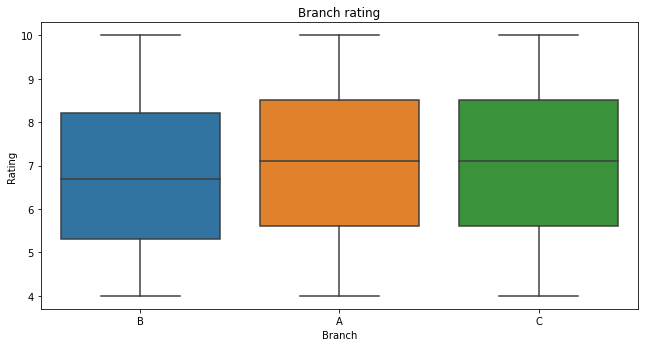

In [27]:
sb.boxplot(x='Branch', y='Rating', data=all_stores_df).set_title('Branch rating')


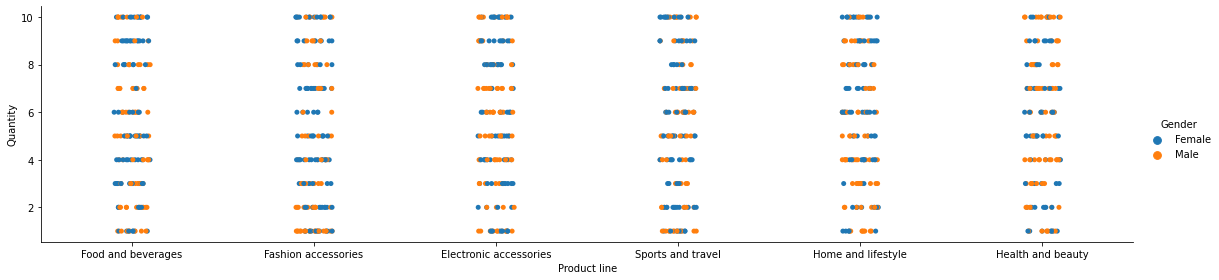

In [28]:
sb.catplot(x='Product line', y='Quantity', hue='Gender', data=all_stores_df, aspect=4, height=4)


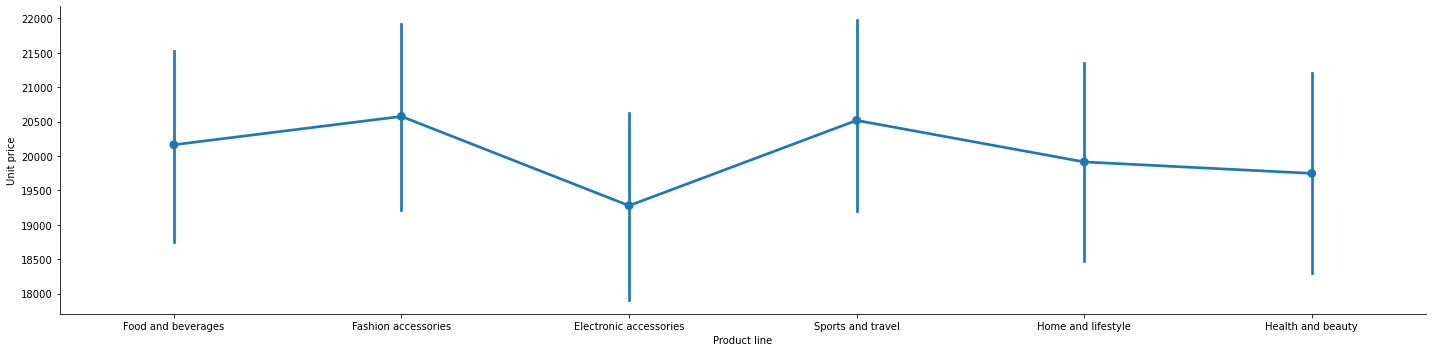

In [29]:
sb.catplot(y='Unit price', x='Product line', data=all_stores_df, kind='point', aspect=4)

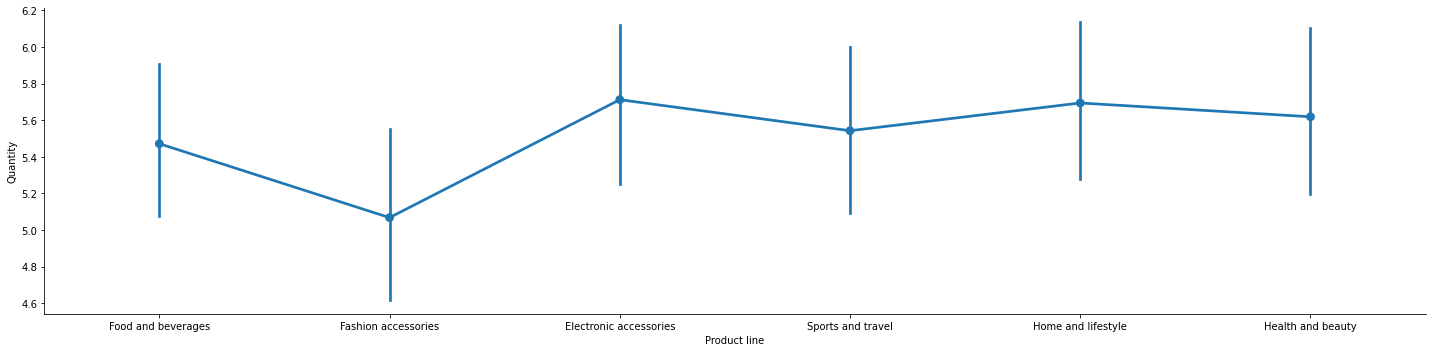

In [30]:
sb.catplot(y='Quantity', x='Product line', data=all_stores_df, kind='point', aspect=4)
